# Example data integration and analysis for ArXiV metadata
## Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
sns.set(font_scale=1.5, style="whitegrid",rc={"lines.linewidth": 2.5})

In [3]:
def time_elapsed(start):
    end = datetime.datetime.now()

    time_to_run = end - start
    minutes = int(time_to_run.seconds/60)
    seconds = time_to_run.seconds % 60
    return "Total runtime: " + str(minutes) + " minutes, " + str(seconds) + " seconds"

In [4]:
start = datetime.datetime.now()


## Import data

There are two different folders for different slices of ArXiV: `per_category` and `per_year`. The easiest for getting the full dataset is to combine `per_year`.

Note: it is very important to specify the data types, particularly `arxiv_id`, as Pandas may assume they are floats based on some initial rows, when they are actually strings. 

In [5]:
dumpdate = "20200101"

In [6]:
datadir = "processed_data/" + dumpdate + "/per_year/"

In [7]:
files = glob.glob(datadir + "*.tsv.zip")
len(files)
files.sort()

In [8]:
dtypes = {
    "abstract": object,
    "acm_class": object,
    "arxiv_id": object,
    "author_text": object,
    "categories": object,
    "comments": object,
    "created": object,
    "doi": object,
    "num_authors": int,
    "num_categories": int,
    "primary_cat": object,
    "title": object,
    "updated": object,
    "created_ym": object
    }

In [9]:
df_all = pd.DataFrame()

for file in files:
    print(file)
    
    yearly_df = pd.read_csv(file,
                            sep="\t",
                            index_col=0,
                            compression='zip',
                            dtype=dtypes,
                            parse_dates=["created","updated"])
        
    df_all = df_all.append(yearly_df)
    
    print("Records this year: ", len(yearly_df), "Cumulative total: ", len(df_all), "\n")

processed_data/20200101/per_year/1993.tsv.zip
Records this year:  6728 Cumulative total:  6728 

processed_data/20200101/per_year/1994.tsv.zip
Records this year:  10085 Cumulative total:  16813 

processed_data/20200101/per_year/1995.tsv.zip
Records this year:  12994 Cumulative total:  29807 

processed_data/20200101/per_year/1996.tsv.zip
Records this year:  15875 Cumulative total:  45682 

processed_data/20200101/per_year/1997.tsv.zip
Records this year:  19621 Cumulative total:  65303 

processed_data/20200101/per_year/1998.tsv.zip
Records this year:  24174 Cumulative total:  89477 

processed_data/20200101/per_year/1999.tsv.zip
Records this year:  27694 Cumulative total:  117171 

processed_data/20200101/per_year/2000.tsv.zip
Records this year:  30672 Cumulative total:  147843 

processed_data/20200101/per_year/2001.tsv.zip
Records this year:  33128 Cumulative total:  180971 

processed_data/20200101/per_year/2002.tsv.zip
Records this year:  36103 Cumulative total:  217074 

processe

### Checking merged dataframe

In [10]:
len(df_all)

1635941

In [11]:
df_all = df_all.drop_duplicates()
len(df_all)

1635941

In [12]:
df_all.sample(2).transpose()

,338889,1548501
abstract,We consider the hydrodynamics of strongly inte...,M-theory on a Calabi-Yau threefold admitting a...
acm_class,NaN,NaN
arxiv_id,1204.6627,1906.0220199999999
author_text,"Yoshinori Matsuo, Sang-Jin Sin, Yang Zhou","Andrés Collinucci, Marco Fazzi, David R. Morri..."
categories,"hep-th,hep-ph",hep-th
comments,"18 pages, 4 figures","57 pages, 13 figures, 1 appendix, 1 ancillary ..."
created,2012-04-30 00:00:00,2019-06-05 00:00:00
doi,10.1007/JHEP07(2012)050,NaN
num_authors,3,4
num_categories,2,1


## Analysis variables

### Adding timestamp variable

In [13]:
df_all['created_ts'] = pd.to_datetime(df_all.created)
df_all['updated_ts'] = pd.to_datetime(df_all.updated)

In [14]:
def has_colon(title):
    if title.find(":") == -1:
        return 0
    else:
        return 1

In [15]:
df_all['has_colon_title'] = df_all.title.apply(has_colon)

In [16]:
df_all.has_colon_title.value_counts()

0    1433997
1     201944
Name: has_colon_title, dtype: int64

In [17]:
def has_doi(doi):
    if doi is np.nan:
        return 0
    else:
        return 1

In [18]:
df_all['has_doi'] = df_all.doi.apply(has_doi)

In [19]:
df_all['title_len'] = df_all.title.apply(len)

In [20]:
df_all['abs_len'] = df_all.abstract.apply(len)

In [21]:
def word_count(string):
    return len(string.split(" "))

In [22]:
df_all['title_words'] = df_all.title.apply(word_count)
df_all['abs_words'] = df_all.abstract.apply(word_count)

In [23]:
df_all['chars_per_word_title'] = df_all.title_len/df_all.title_words
df_all['chars_per_word_abs'] = df_all.abs_len/df_all.abs_words

In [24]:
df_all['abs_title_ratio_chars'] = df_all.abs_len/df_all.title_len

# Analyses

In [25]:
df_all.set_index("created_ts", inplace=True, drop=False)

In [26]:
df_all.sample(2).transpose()

created_ts,2002-10-30 00:00:00,2013-11-26 00:00:00
abstract,A nice factorization is given for the characte...,Bell's 1964 theorem causes a severe problem fo...
acm_class,NaN,NaN
arxiv_id,math/0210458,1311.6852
author_text,Frederic Chapoton,"Eric G. Cavalcanti, Raymond Lal"
categories,math.CO,quant-ph
comments,"14 pages, 5 figures","15 pages, 1 figure. V2: replaced with final pu..."
created,2002-10-30 00:00:00,2013-11-26 00:00:00
doi,10.1016/S0097-3165(03)00048-7,10.1088/1751-8113/47/42/424018
num_authors,1,2
num_categories,1,1


Text(0.5, 0, 'Number of authors')

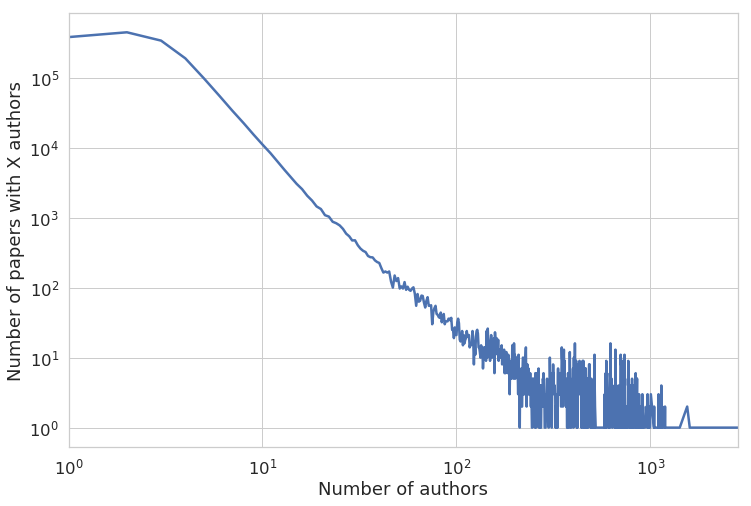

In [27]:
num_authors_counts = df_all.num_authors.value_counts().sort_index()
fig = num_authors_counts.plot(kind='line', 
                              logy=True, 
                              logx=True, 
                              figsize=[12,8])

fig.set_ylabel("Number of papers with X authors")
fig.set_xlabel("Number of authors")

In [28]:
df_all.set_index("updated_ts", inplace=True, drop=False)

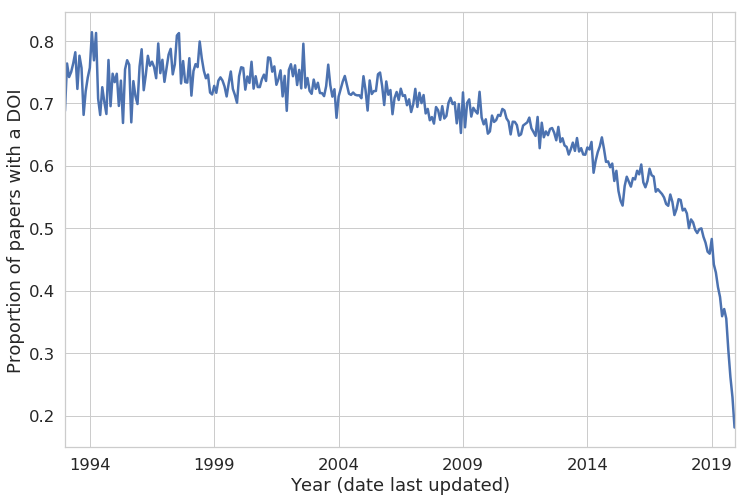

In [29]:
fig = df_all.groupby(pd.Grouper(freq='M')).has_doi.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of papers with a DOI")
l = fig.set_xlabel("Year (date last updated)")

In [30]:
df_all.set_index("created_ts", inplace=True, drop=False)

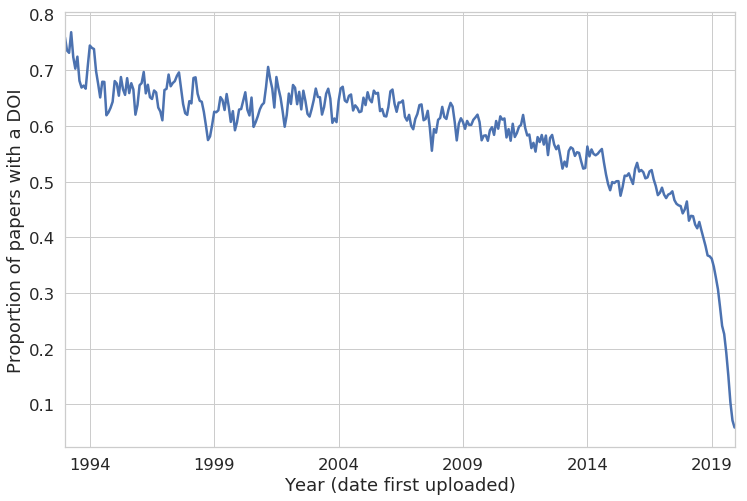

In [31]:
fig = df_all.groupby(pd.Grouper(freq='M')).has_doi.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of papers with a DOI")
l = fig.set_xlabel("Year (date first uploaded)")

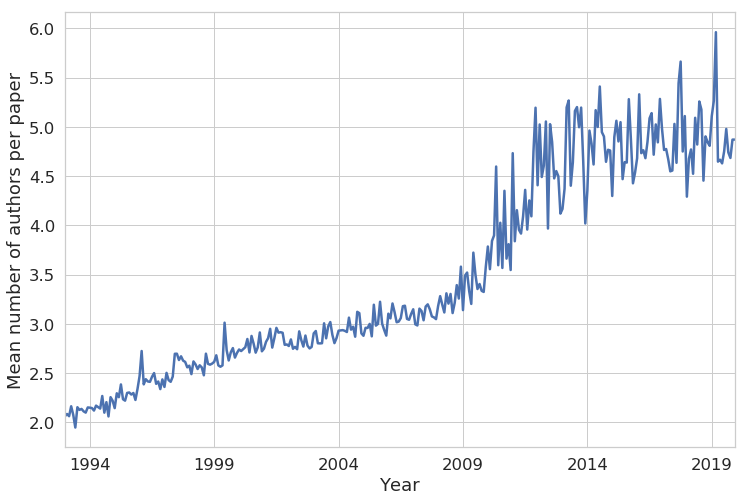

In [32]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_authors.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of authors per paper")
l = fig.set_xlabel("Year")

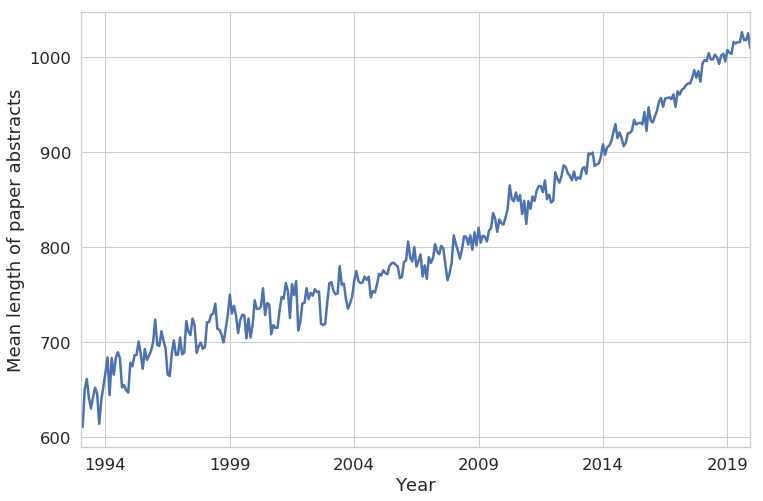

In [33]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts")
l = fig.set_xlabel("Year")


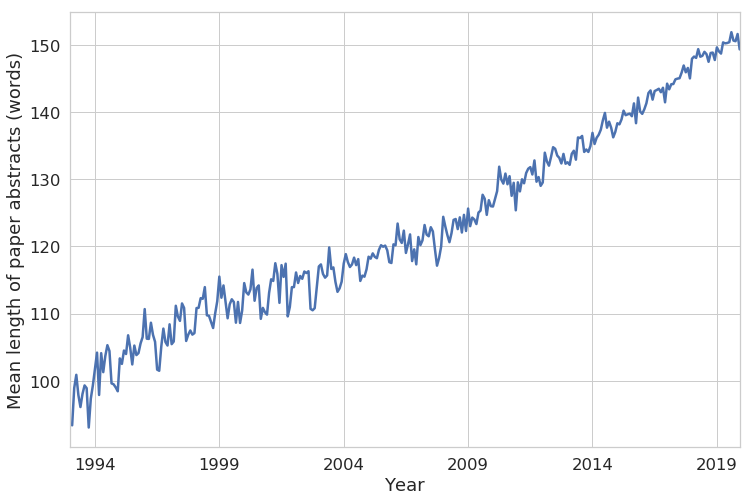

In [34]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_words.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts (words)")
l = fig.set_xlabel("Year")

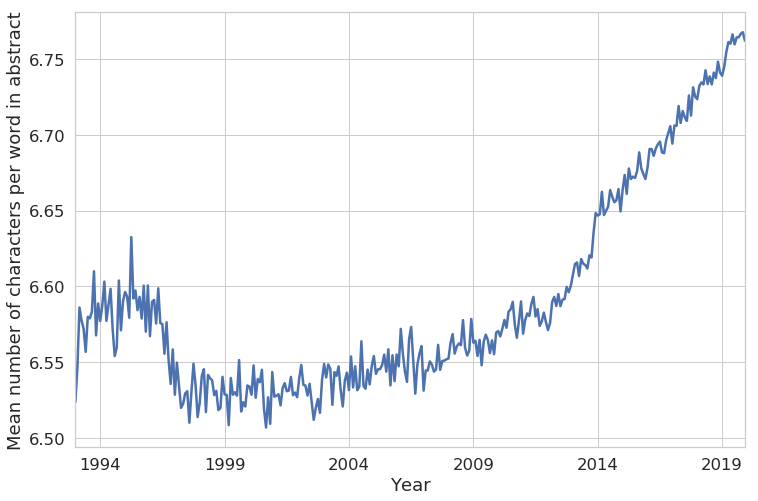

In [35]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_abs.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in abstract")
l = fig.set_xlabel("Year")

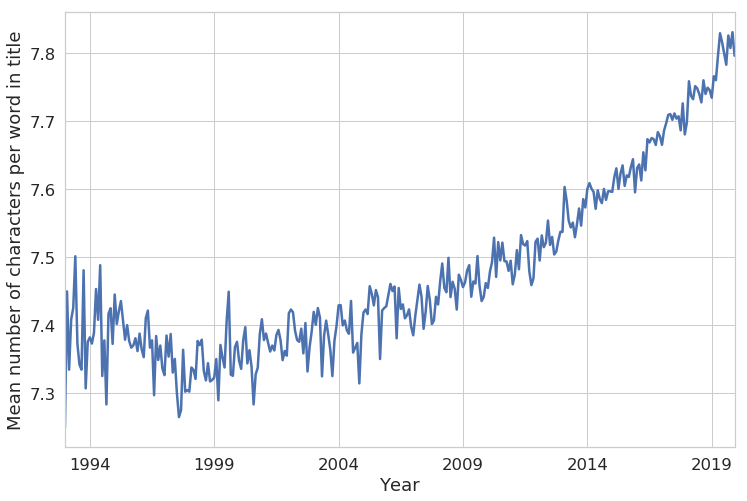

In [36]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in title")
l = fig.set_xlabel("Year")

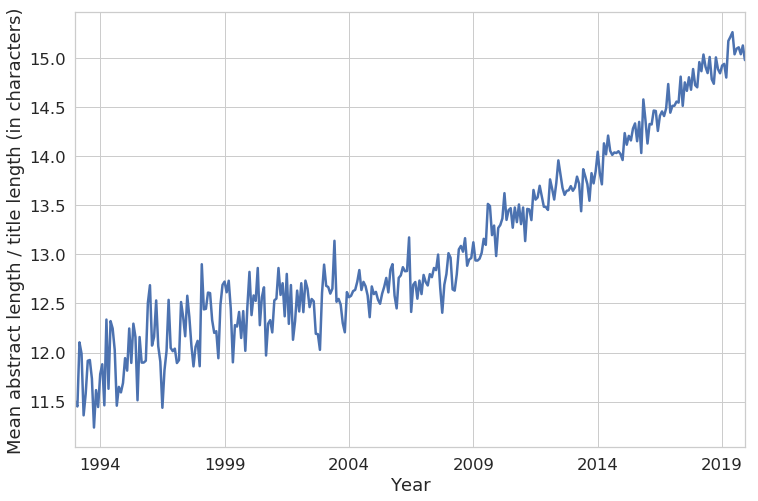

In [37]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_title_ratio_chars.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean abstract length / title length (in characters)")
l = fig.set_xlabel("Year")

In [38]:
monthly_title_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).title_len.mean()).reset_index(level=0)

monthly_title_len[0:5]

monthly_title_len.columns = ["date","title_len"]

In [39]:
def to_ym(dt):
    try:
        return dt.strftime("%Y-%m")
    except:
        return ""

Text(0.2, 0.82, '$r^2$=0.972')

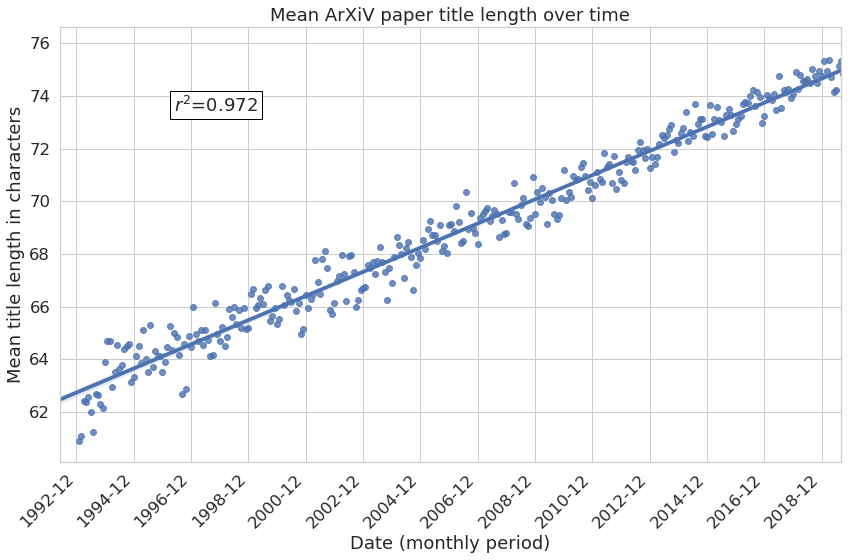

In [40]:
df = monthly_title_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-7,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper title length over time")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean title length in characters")

from scipy import stats
r2 = stats.pearsonr(monthly_title_len.date_f, monthly_title_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)
plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

In [41]:
monthly_abs_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).abs_len.mean()).reset_index(level=0)

monthly_abs_len.columns = ["date","title_len"]

Text(0.2, 0.82, '$r^2$=0.953')

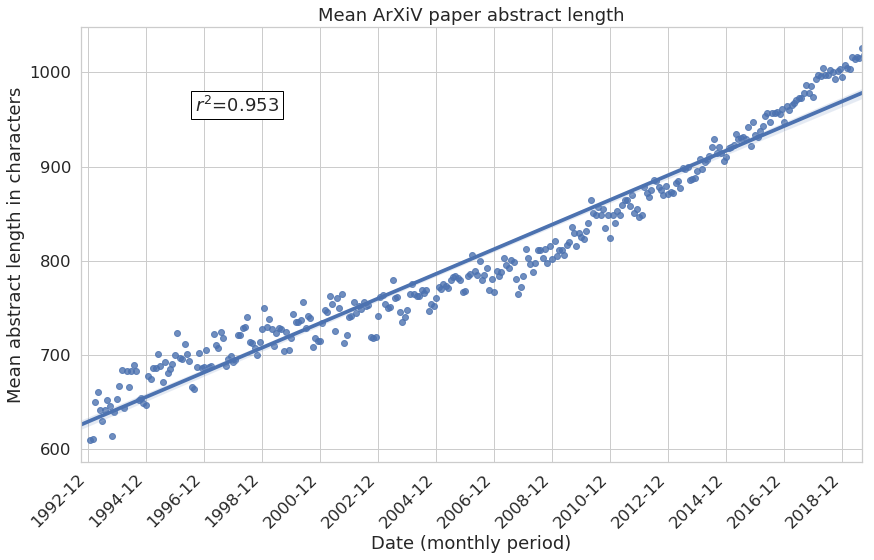

In [42]:
df = monthly_abs_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-3,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper abstract length")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean abstract length in characters")

from scipy import stats

r2 = stats.pearsonr(monthly_abs_len.date_f, monthly_abs_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)

plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

Text(0.5, 1.0, 'Length of ArXiV paper titles over time')

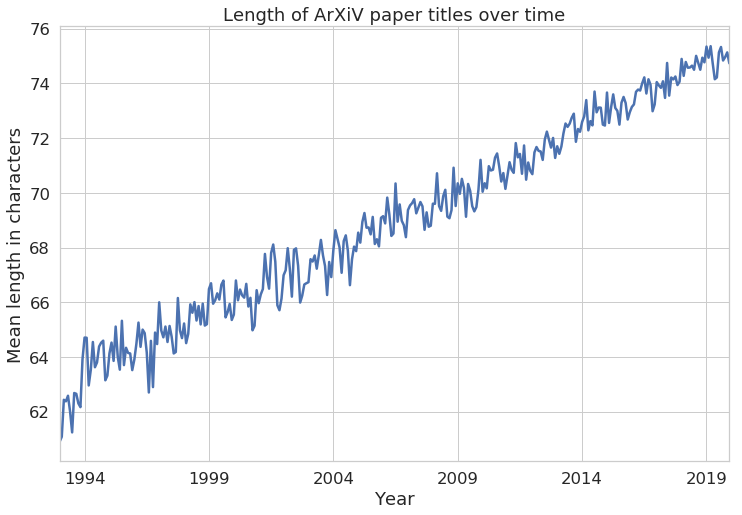

In [43]:
fig = df_all.groupby(pd.Grouper(freq='M')).title_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length in characters")
l = fig.set_xlabel("Year")
fig.set_title("Length of ArXiV paper titles over time")

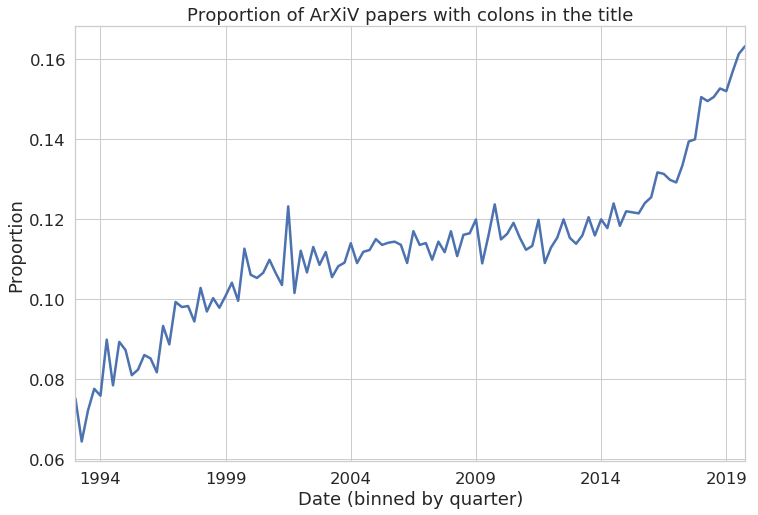

In [44]:
fig = df_all.groupby(pd.Grouper(freq='Q')).has_colon_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion")
l = fig.set_xlabel("Date (binned by quarter)")
l = fig.set_title("Proportion of ArXiV papers with colons in the title")

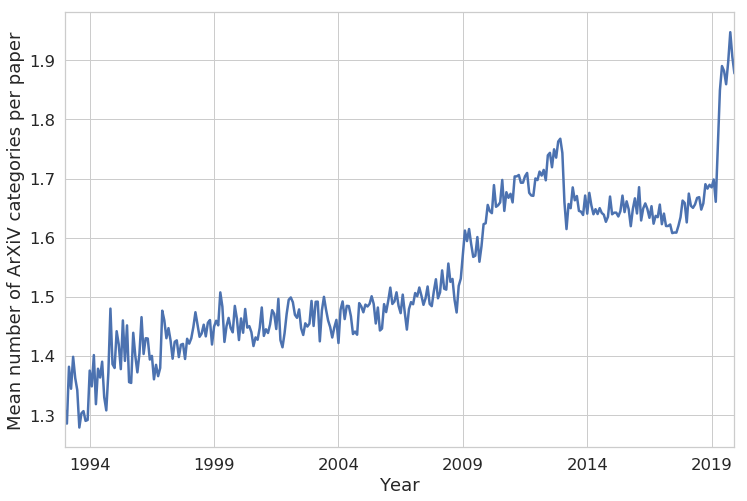

In [45]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_categories.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of ArXiV categories per paper")
l = fig.set_xlabel("Year")

## Text analysis

### Functions for text matching

In [46]:
def search_count(df,pattern,period="year"):
    """
    Helper function for search_counts. Takes a dataframe and a string pattern and
    returns the yearly proportion of items that match the string (case insensitive).
        
    """
      
    
    df_temp = df
    
    
    df_temp['search_abs'] = df_temp['abstract'].str.lower().str.contains(pattern)
    df_temp['search_title'] = df_temp['title'].str.lower().str.contains(pattern)

    
    
    df_temp.search_abs.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_abs.replace(to_replace=True, value=1, inplace=True)
    
    df_temp.search_title.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_title.replace(to_replace=True, value=1, inplace=True)
    
    yearly_matches = df_temp.query('search_abs == 1 or search_title == 1').created_ts.dt.year.value_counts().sort_index().fillna(0)
    yearly_all = df_temp.created_ts.dt.year.value_counts().sort_index().fillna(0)
    
    df = (yearly_matches/yearly_all).rename(pattern).fillna(0)
    
    return df


In [47]:
def search_counts(df,pattern_str_or_list,period="year"):
    """
    Main function for search_counts. Takes a dataframe and a string pattern or list
    of string patterns and returns the yearly proportion of items that match the string
    in a pandas DataFrame.
        
    """
    
    
    if type(pattern_str_or_list) is not list:
        df = pd.DataFrame(search_count(df,pattern_str_or_list))
        df.index.rename("year",inplace=True)
        return df.loc[(df!=0).any(1)]
    
    else:
        pattern_list = []
        for item in pattern_str_or_list:
            pattern_list.append(search_count(df,item).rename(item))
        
        df = pd.DataFrame(pattern_list).transpose()
        df.index.rename("year",inplace=True)
        
        return df.loc[(df!=0).any(1)] # remove all rows with all zeros


### Example queries

In [48]:
d = search_counts(df_all, ["reprod","open","replic"])
d

,reprod,open,replic
year,,,
1993,0.022295,0.023781,0.001189
1994,0.023302,0.020129,0.004165
1995,0.024858,0.021933,0.003540
1996,0.023307,0.023181,0.003213
1997,0.025942,0.024566,0.003364
1998,0.024820,0.024903,0.003847
1999,0.026396,0.027515,0.003864
2000,0.024746,0.030451,0.004010
2001,0.023787,0.029129,0.003200


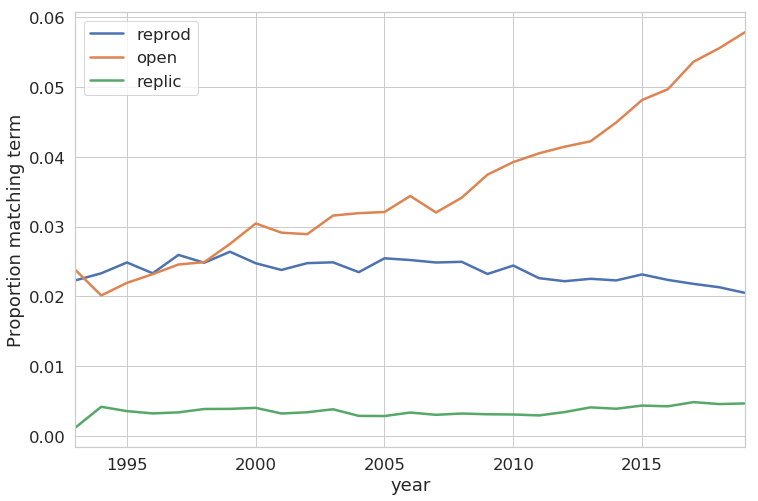

In [49]:
fig = d.plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")


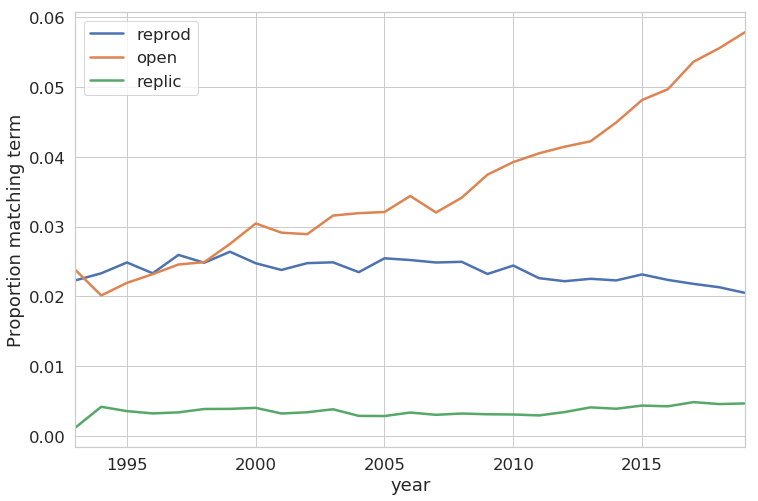

In [50]:
terms = ["reprod","open","replic"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

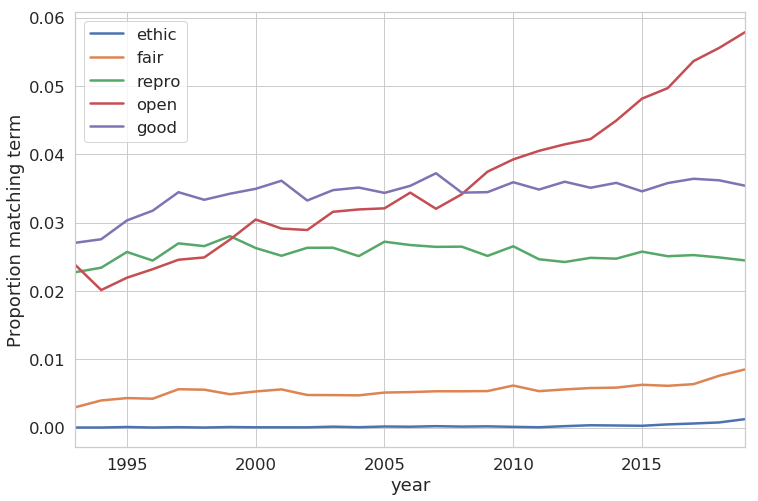

In [51]:
terms = ["ethic","fair","repro","open","good"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

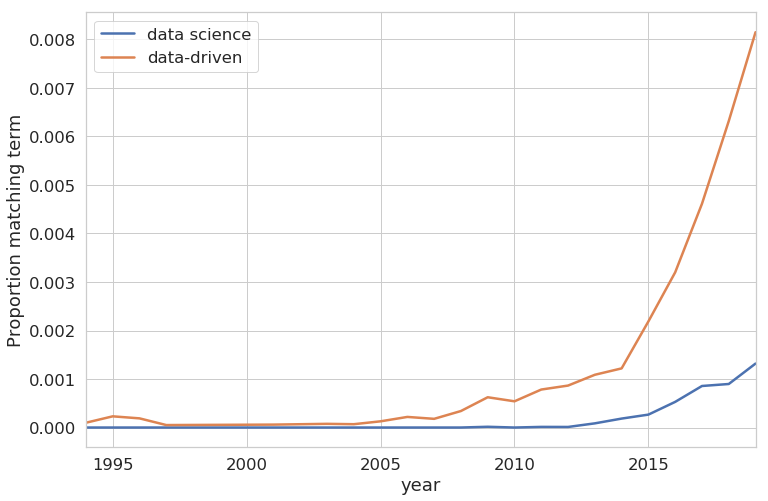

In [52]:
terms = ["data science","data-driven"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

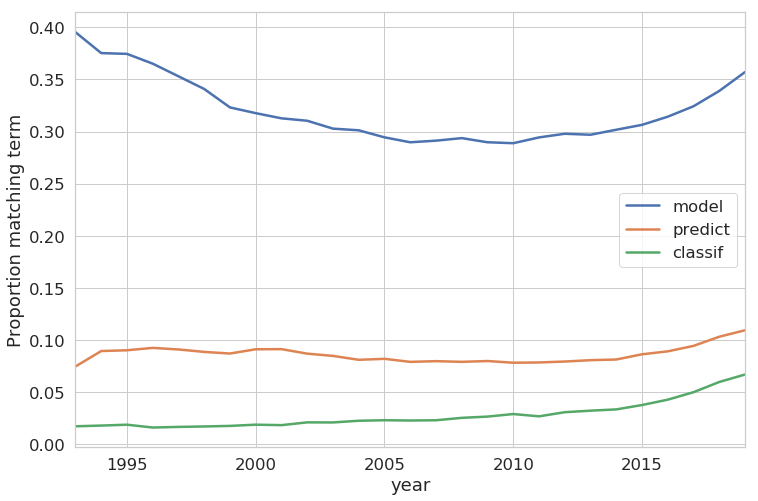

In [53]:
terms = ["model","predict","classif"]
fig = search_counts(df_all,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

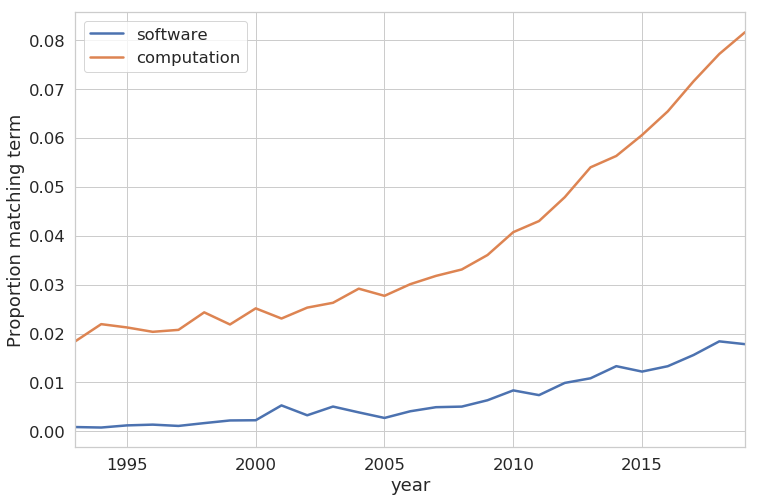

In [54]:
terms = ["software","computation"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

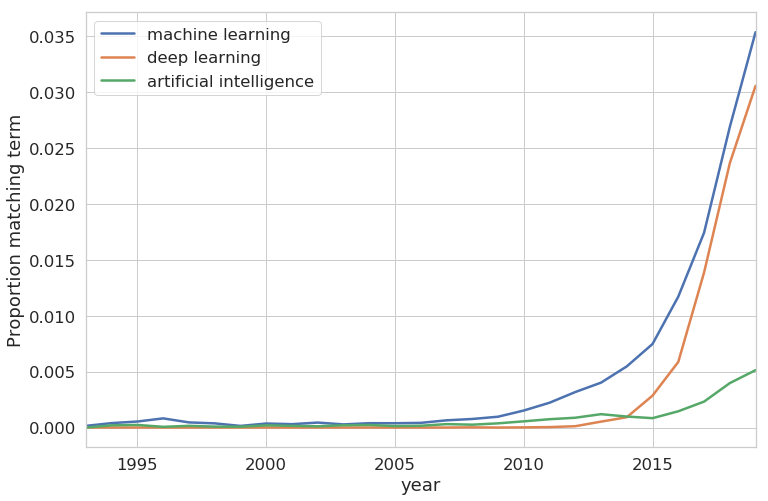

In [55]:
terms = ["machine learning","deep learning","artificial intelligence"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

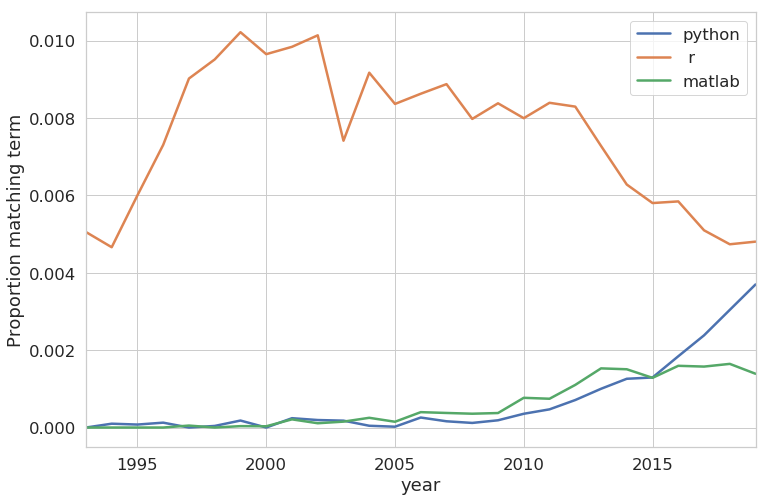

In [56]:
terms = ["python"," r ","matlab"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

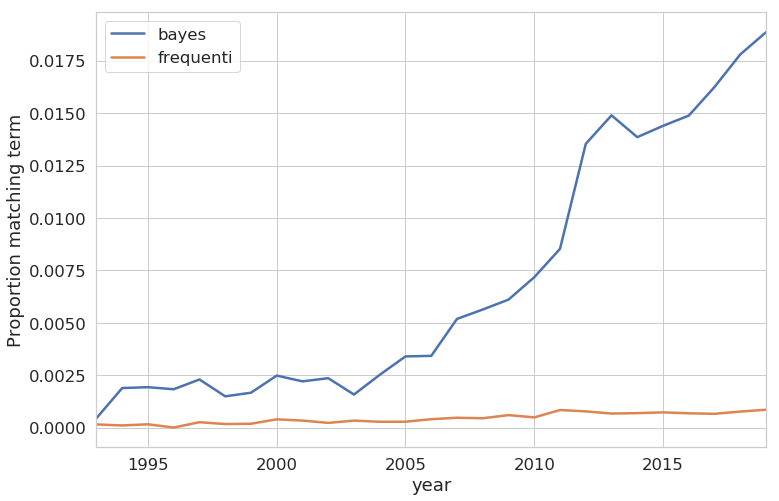

In [57]:
terms = ["bayes","frequenti"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching a specific category

Create a new dataframe by filtering the `categories` variable. If you're filtering from df_all, you shouldn't need to drop duplicates, but it is good to be safe.

In [58]:
df_astro = df_all[df_all.categories.str.contains("astro")].copy()

In [59]:
len(df_astro)

264955

In [60]:
df_astro = df_astro.drop_duplicates()
len(df_astro)

264955

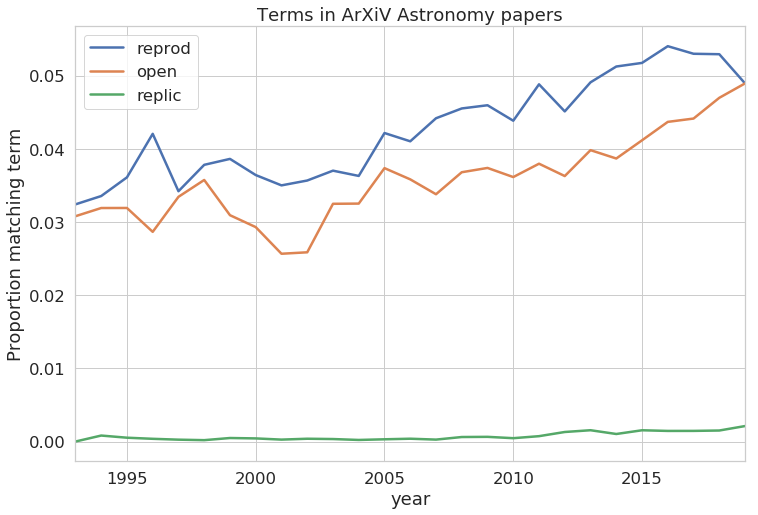

In [61]:
terms = ["reprod","open","replic"]
fig = search_counts(df_astro, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

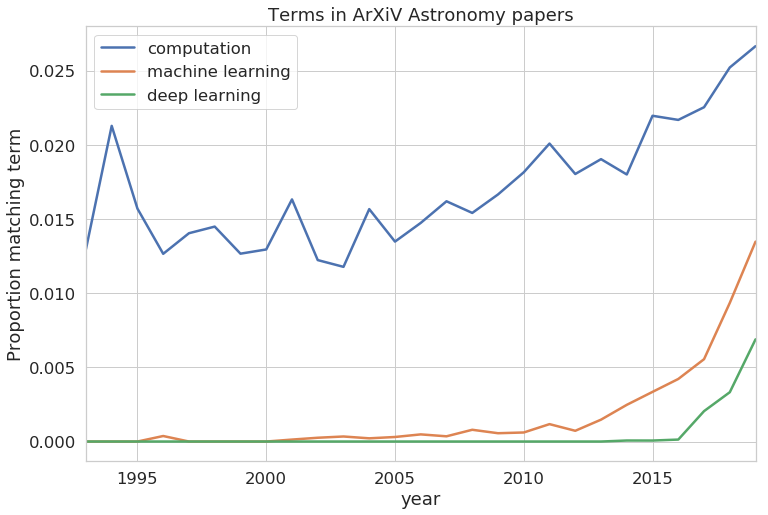

In [62]:
terms = ["computation","machine learning","deep learning"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

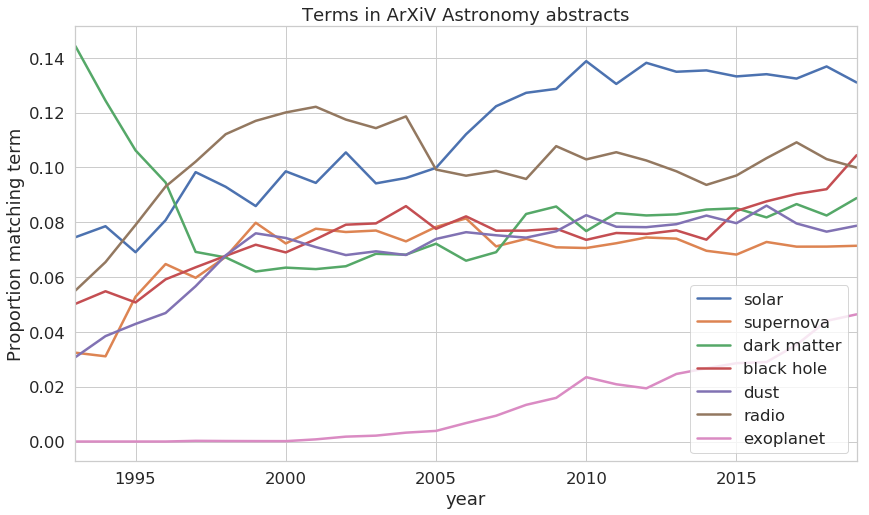

In [63]:
terms = ["solar","supernova","dark matter","black hole","dust","radio", "exoplanet"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[14,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy abstracts")

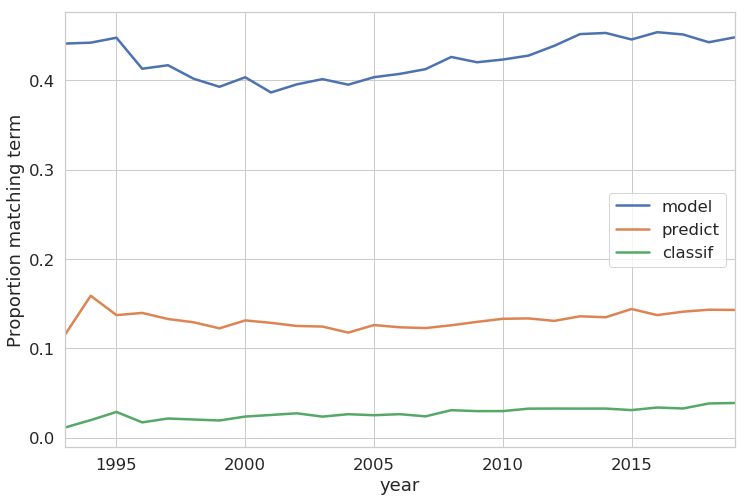

In [64]:
terms = ["model","predict","classif"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

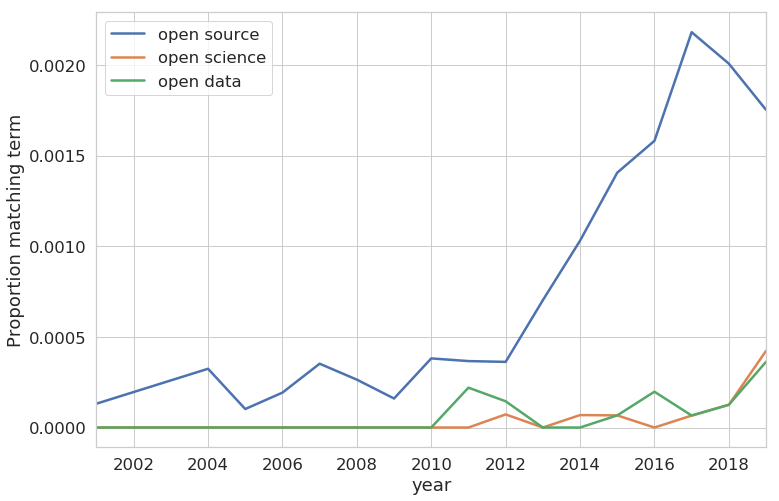

In [65]:
terms = ["open source","open science","open data"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching multiple categories

If you're using this method instead of searching, you must drop duplicates, as papers are included in a category if they are posted or cross-posted.

In [66]:
categories = ["cs.AI", "cs.LG", "stat.ML"]

In [67]:
df_cat_list = []
for cat in categories:
    df_cat_list.append(df_all[df_all.categories.str.contains(cat)].copy())
    
df_cats = pd.concat(df_cat_list)

In [68]:
len(df_cats)

103195

In [69]:
df_cats = df_cats.drop_duplicates()
len(df_cats)

68280

In [70]:
df_cats.sample(3).transpose()

created_ts,2017-08-01 00:00:00,2018-08-28 00:00:00,2018-12-08 00:00:00
abstract,"The conventional CNN, widely used for two-dime...",Cross-domain collaborative filtering (CF) aims...,Utilizing recently introduced concepts from st...
acm_class,NaN,NaN,NaN
arxiv_id,1708.00587,1808.09784,1812.03271
author_text,"Si-Baek Seong, Chongwon Pae, Hae-Jeong Park","Kwei-Herng Lai, Ting-Hsiang Wang, Heng-Yu Chi,...","Xiaoyong Yuan, Zheng Feng, Matthew Norton, Xia..."
categories,"cs.NE,cs.LG","cs.IR,cs.LG,stat.ML","cs.LG,stat.ML"
comments,29 pages,NaN,accepted at AAAI-19
created,2017-08-01 00:00:00,2018-08-28 00:00:00,2018-12-08 00:00:00
doi,NaN,NaN,NaN
num_authors,3,6,4
num_categories,2,3,2


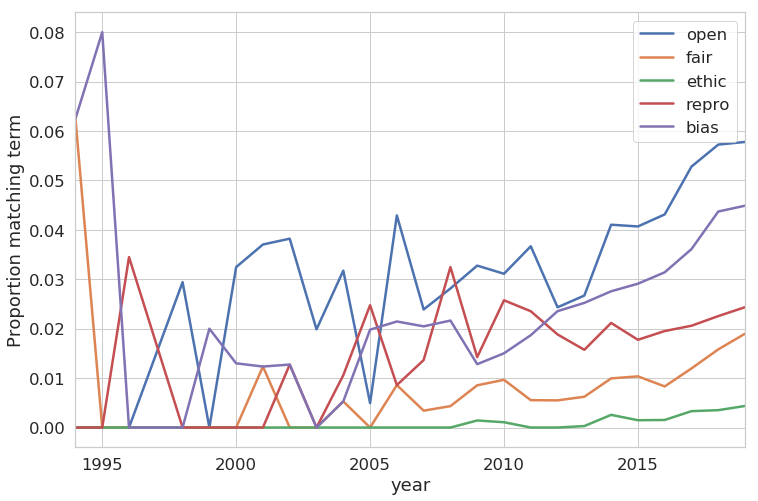

In [71]:
terms = ["open","fair","ethic","repro","bias"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

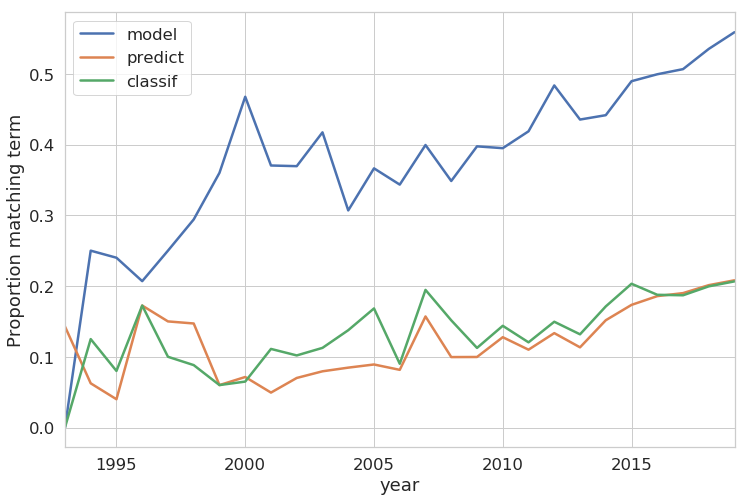

In [72]:
terms = ["model","predict","classif"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

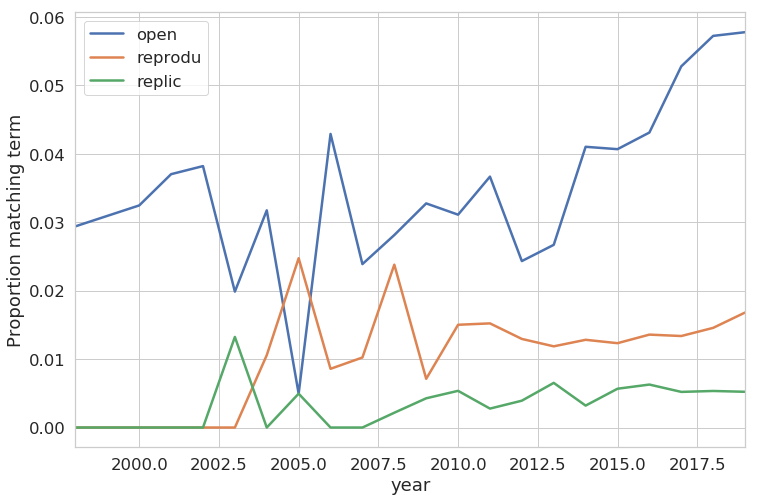

In [73]:
terms = ["open","reprodu","replic"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

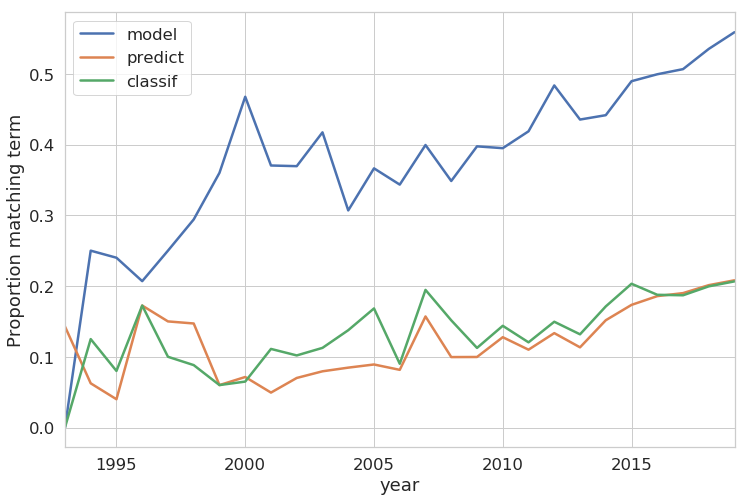

In [74]:
terms = ["model","predict","classif"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

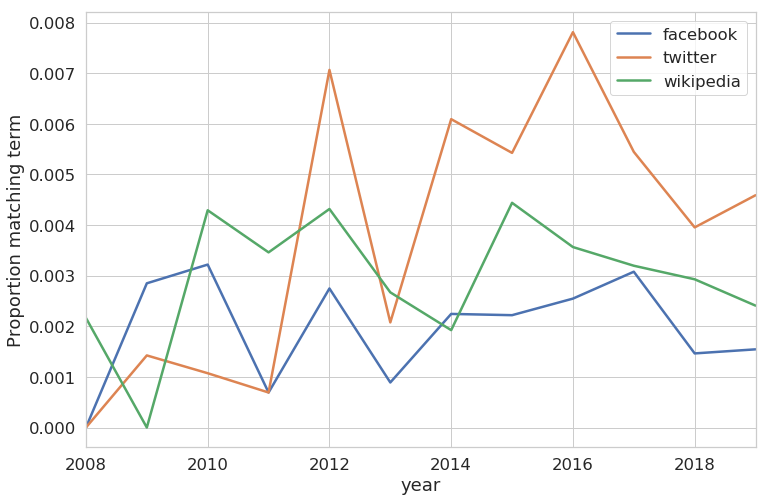

In [75]:
terms = ["facebook","twitter","wikipedia"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Author names analysis

### Most common last names

In [76]:
def last_name(name):
    name_split = name.split(" ")
    return name_split[len(name_split)-1]
        

In [77]:
def first_name(name):
    name_split = name.split(" ")
    return name_split[0]
        

In [78]:
allnames = []
count = 0
for paper in df_all.iterrows():
    for author in paper[1].author_text.split(", "):
        allnames.append(last_name(author))
    count += 1
    if count % 100000 == 0:
        print(count)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000


In [79]:
allnames_s = pd.Series(allnames)
allnames_s.value_counts()[0:50]

Wang             59507
Zhang            53891
Li               50100
Liu              40519
Chen             36692
Kim              23488
Yang             22601
Lee              21906
Xu               18563
Wu               18548
Huang            15849
Zhou             15017
Zhao             14984
Zhu              13487
Sun              13308
Yu               11596
Smith            11092
Ma               10967
Lin              10957
Collaboration    10591
Lu               10361
Hu                9813
Guo               9178
He                8402
Jiang             8326
Park              7856
Gao               7805
Singh             7039
Kumar             6921
Zheng             6870
Shen              6771
Han               6715
Luo               6514
Williams          6364
Song              6360
Yan               6229
Yuan              6120
Martin            6076
Tang              6032
Schmidt           5977
Chang             5862
Cao               5597
Silva             5532
Shi        

### Papers with authors including "Collaboration" or "Consortium" 

In [80]:
def author_search_count(df,pattern,period="year"):
    """
    Helper function for author_search_counts. Takes a dataframe and a string pattern and
    returns the yearly proportion of items that match the string (case insensitive).
        
    """
      
    
    df_temp = df
    
    
    df_temp['search_author'] = df_temp['author_text'].str.lower().str.contains(pattern)
    
    
    df_temp.search_author.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_author.replace(to_replace=True, value=1, inplace=True)
    
    yearly_matches = df_temp.query('search_author == 1').created_ts.dt.year.value_counts().sort_index().fillna(0)
    yearly_all = df_temp.created_ts.dt.year.value_counts().sort_index().fillna(0)
    
    df = (yearly_matches/yearly_all).rename(pattern).fillna(0)
    
    return df


In [81]:
def author_search_counts(df,pattern_str_or_list,period="year"):
    """
    Main function for author_search_counts. Takes a dataframe and a string pattern or list
    of string patterns and returns the yearly proportion of items that match the string
    in a pandas DataFrame.
        
    """
    
    
    if type(pattern_str_or_list) is not list:
        df = pd.DataFrame(search_count(df,pattern_str_or_list))
        df.index.rename("year",inplace=True)
        return df.loc[(df!=0).any(1)]
    
    else:
        pattern_list = []
        for item in pattern_str_or_list:
            pattern_list.append(author_search_count(df,item).rename(item))
        
        df = pd.DataFrame(pattern_list).transpose()
        df.index.rename("year",inplace=True)
        
        return df.loc[(df!=0).any(1)] # remove all rows with all zeros


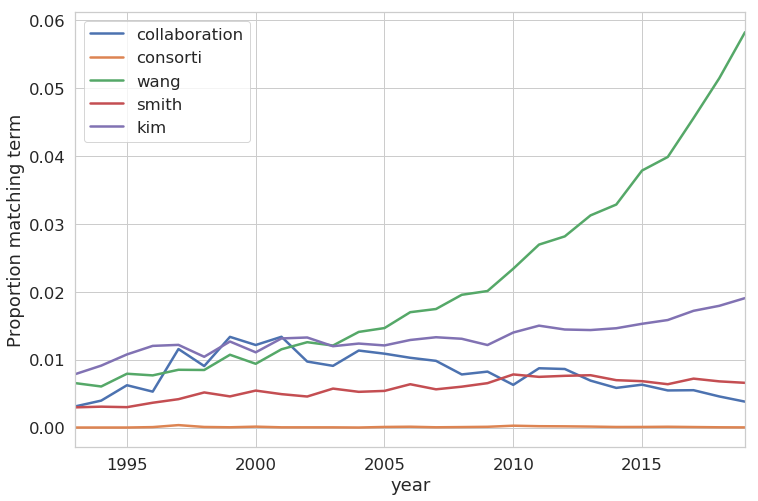

In [82]:
terms = ["collaboration","consorti","wang","smith","kim"]
fig = author_search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

### Proportion of authors who use initials vs full first names

In [83]:
def first_author_initials(s):
    if s.split(", ")[0].find(".") > -1:
        return 1
    else:
        return 0

In [84]:
def all_author_initials(s):
    initials_count = 0
    for author in s.split(", "):
        if author.find(".") > -1:
            initials_count += 1
            
    return initials_count/len(s.split(", "))

In [85]:
df_all['first_author_initials'] = df_all.author_text.apply(first_author_initials)

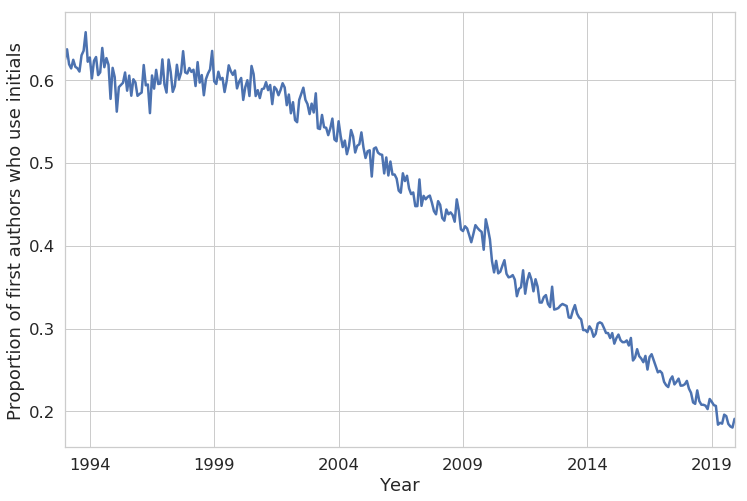

In [86]:
fig = df_all.groupby(pd.Grouper(freq='M')).first_author_initials.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of first authors who use initials")
l = fig.set_xlabel("Year")

In [87]:
df_all['all_author_initials'] = df_all.author_text.apply(all_author_initials)

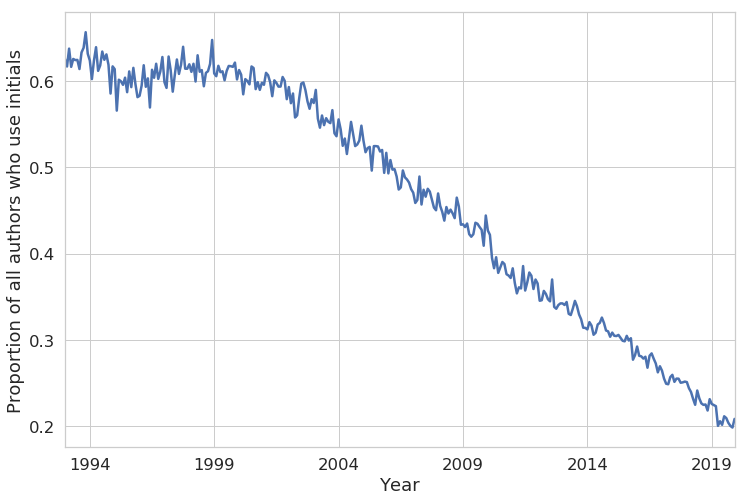

In [88]:
fig = df_all.groupby(pd.Grouper(freq='M')).all_author_initials.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of all authors who use initials")
l = fig.set_xlabel("Year")

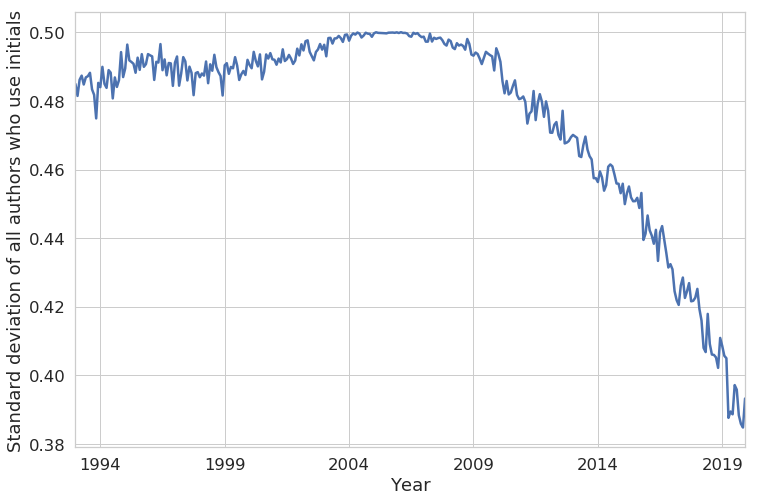

In [89]:
fig = df_all.groupby(pd.Grouper(freq='M')).first_author_initials.std().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Standard deviation of all authors who use initials")
l = fig.set_xlabel("Year")

In [90]:
time_elapsed(start)

'Total runtime: 10 minutes, 51 seconds'